# Numerische Lösung des mathematischen Pendels
Die Differentialgleichung $\ddot{\phi}+\omega^2\sin(\phi)=0$ hat keine analytische Lösung. Sie stellt ein sehr gutes Beispiel für den Einstieg in die numerische Lösung dar. Dafür ist es zweckmäßig (bzw. notwendig), die Differentialgleichung 2. Ordnung in ein System von Differentialgleichungen 1. Ordnung umzuformen. Hier sieht diese Umwandlung wie folgt aus:
$\frac{d}{dt}(\phi)=\dot{\phi}$ und $\frac{d}{dt}(\frac{d\phi}{dt}) =-\omega^2\sin(\phi)$. Die numerische Lösung mit der routine 'odeint' liefert dann die Lösungen $\phi(t)$ und $\dot{\phi}(t)$ in den beiden Spalten der Matrix 'sol' (Zeilen entsprechen den Zeitpunkten t), wobei wir die Anfangsbedingungen $\phi(t=0)=\phi_0$ und $\dot{\phi}(t=0)=0$ wählen.

Für das mathematische (Faden-)Pendel kommt es für $\phi_0>90°$ zu gedanklichen Schwierigkeiten, z.B. würde die Masse fallen und den Faden erst später spannen. Die gleiche Differentialgleichung $\ddot{\phi}+\omega^2\sin(\phi)=0$ beschreibt aber auch das physikalische Pendel für einen starren Körper, wobei $\omega=\sqrt{r_smg/I}$ mit dem Abstand $r_s$ zwischen Schwer- und Aufhängepunkt des Pendels mit Masse $m$ und Trägheitsmoment $I$. Hier lohnt es sich, auch den Fall $\phi_0>0$ zu untersuchen.  

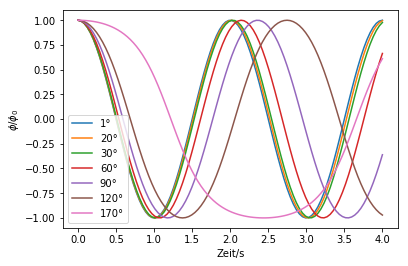

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# define the differential equation
def odefun(Y, t, omega):
    phi, phidot = Y
    dYdt = [phidot, -omega**2 * np.sin(phi)]
    return dYdt

# total time of integration
T = 4
# start values \phi(t=0)=phi0
phi0 = np.array([1, 20, 30, 60, 90, 120, 170]) * np.pi / 180

# solve differential equation for different starting values phi0
for a in range(len(phi0)):
    t = np.linspace(0, T, 100)  # Adjust number of points as needed
    Y0 = [phi0[a], 0] # assign starting conditions for integration of differential equation
    omega = np.pi  # define eigen frequency
    sol = odeint(odefun, Y0, t, args=(omega,)) # solve the differential equation
    phi = sol[:, 0]   # extract angle phi from the solution matrix (col number 0), phidot is col number 1 
    plt.plot(t, phi / phi0[a]) # plot solution for phi normalized to initial value phi0

# plot the results
plt.gca().set_prop_cycle(None)  # Reset color cycle for legend
plt.legend([f'{phi * 180 / np.pi:.0f}°' for phi in phi0]) 
plt.xlabel('Zeit/s')
plt.ylabel('$\phi/\phi_0$')
plt.show()
